In [0]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [0]:
xor_input = np.array([[-1.2,-0.8],[-1.1,0.4],[0.57,-1.8],[1.23,0.92]])
xor_output = np.array(['0','1','1','0'])
X = xor_input
y = xor_output

In [0]:
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

In [0]:
X = X / 255 #scaling input dataset
digits = len(np.unique(y)) #10
examples = y.shape[0] #70000
y2 = y.reshape(1, examples)
Y_new = np.eye(digits)[y2.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [304]:
m = int(input("Enter the training data size [range (0, 70000)]: "))
print("Number of Training Data:",m)
m_test = X.shape[0] - m
print("Number of Test Data:",m_test)
X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

# shuffle the dataset
shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

Enter the ratio for train test split [range (0, 1)]: 0.87
Number of Training Data: 60900
Number of Test Data: 9100


Image Data


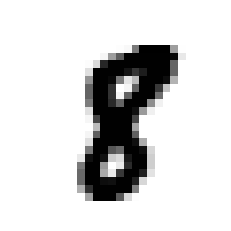

Label: 8


In [305]:
#Checking the data
i = 1 #i value can vary but it should be with range of m, that is number of training data
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
print("Image Data")
plt.show()
print("Label:",np.argmax(Y_train[:,i]))

Activation Function

In [306]:
def linear(z):
  if z>0:
    return 1
  else:
    return -1

def sigmoid(z):
  return 1. / (1. + np.exp(-z))

def tanh(z):
  return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def ReLU(z):
  return np.maximum(0,z)

activation_function = linear #default option
print("Choose activation function among the option given below:")
print("1.Linear function")
print("2.Sigmoid function")
print("3.Tanh function")
print("4.ReLU function")

opt = int(input("Enter in integer:"))
if opt == 1:
  activation_function = linear
elif opt == 2:
  activation_function = sigmoid
elif opt == 3:
  activation_function = tanh
elif opt == 4:
  activation_function = ReLU

Choose activation function among the option given below:
1.Linear function
2.Sigmoid function
3.Tanh function
4.ReLU function
Enter in integer:2


Forward Propagation

In [0]:
def feed_forward(X, weights, bias):

    forward = dict()
    forward[1] = activation_function( np.matmul(weights[0], X) + bias[0] )

    for i in range(2,len(weights)+1):
      forward[i] = activation_function( np.matmul(weights[i-1], forward[i-1]) + bias[i-1] )

    return forward

Back Propagation

In [0]:
def back_propagate(X, Y, weights, bias, forward):

    grads_dW = dict()
    grads_db = dict()
    dZ = forward[len(forward)] - Y
    grads_dW[len(forward)] = (1./m_batch) * np.matmul(dZ, forward[len(forward)-1].T)
    grads_db[len(forward)] = (1./m_batch) * np.sum(dZ, axis=1, keepdims=True)

    for i in range(len(forward)-1,1,-1):
      dA = np.matmul(weights[i].T,dZ)
      dZ = dA * forward[i] * (1 - forward[i])
      grads_dW[i] = (1./m_batch) * np.matmul(dZ, forward[i-1].T)
      grads_db[i] = (1./m_batch) * np.sum(dZ, axis=1, keepdims=True)

    dA = np.matmul(weights[1].T, dZ)
    dZ = dA * forward[1] * (1 - forward[1])
    grads_dW[1] = (1./m_batch) * np.matmul(dZ, X.T)
    grads_db[1] = (1./m_batch) * np.sum(dZ, axis=1, keepdims=True)
    
    return grads_dW, grads_db

Designing Neural Network

In [309]:
np.random.seed(186)

# hyperparameters
number_of_hidden_layers = int(input("Enter number of hidden layer:"))
neurons_in_each_layer = list()
neurons_in_each_layer.append(X_train.shape[0]) #input layer
for i in range(number_of_hidden_layers):
  neurons_in_each_layer.append(int(input("Enter number of neurons:")))
neurons_in_each_layer.append(digits)#output layer

learning_rate = float(input("Enter learning rate:"))
beta = .9 #regulatization
batch_size = int(input("Enter batch size:"))
batches = -(-m // batch_size)
print("Number of batches:",batches)

Enter number of hidden layer:1
Enter number of neurons:50
Enter learning rate:0.3
Enter batch size:500
Number of batches: 122


In [0]:
weights = dict()
bias = dict()
for i in range(1,len(neurons_in_each_layer)):
  weights[i-1] = np.random.randn(neurons_in_each_layer[i], neurons_in_each_layer[i-1]) * np.sqrt(1. / neurons_in_each_layer[i-1])
  bias[i-1] = np.zeros((neurons_in_each_layer[i], 1)) * np.sqrt(1. / neurons_in_each_layer[i-1])

V_dW = dict()
V_db = dict()

for i in range(len(weights)):
  V_dW[i] = np.zeros(weights[i].shape)
  V_db[i] = np.zeros(bias[i].shape)


Mini Batch Gradient Descent

In [311]:
epoch = int(input("Enter epoch value:"))

Enter epoch value:1000


In [312]:
acc_train_list = list()
acc_test_list = list()
for i in range(epoch): #convergence
    #print("Epoch:",i+1)
    permutation = np.random.permutation(X_train.shape[1])
    X_train_shuffled = X_train[:, permutation]
    Y_train_shuffled = Y_train[:, permutation]

    for j in range(batches):

        begin = j * batch_size
        end = min(begin + batch_size, X_train.shape[1] - 1)

        X_shuf = X_train_shuffled[:, begin:end]
        Y_shuf = Y_train_shuffled[:, begin:end]
        m_batch = end - begin

        forward = feed_forward(X_shuf, weights, bias)
        grads_dW, grads_db = back_propagate(X_shuf, Y_shuf, weights, bias, forward)

        for k in range(len(V_dW)):
          V_dW[k] = (beta * V_dW[k] + (1. - beta) * grads_dW[k+1])
          V_db[k] = (beta * V_db[k] + (1. - beta) * grads_db[k+1])

        for k in range(len(weights)):
          weights[k] = weights[k] - learning_rate * V_dW[k]
          bias[k] = bias[k] - learning_rate * V_db[k]
        
    #Accuracy score of Training Data
    forward = feed_forward(X_train, weights, bias)
    acc_train = accuracy_score(np.argmax(forward[len(forward)], axis=0), np.argmax(Y_train, axis=0))
    #Accuracy score of Test Data
    forward = feed_forward(X_test, weights, bias)
    acc_test = accuracy_score(np.argmax(forward[len(forward)], axis=0), np.argmax(Y_test, axis=0))
    
    print("Epoch {}: Accuracy score on Training Data = {},   Accuracy score on Test Data = {}".format(i+1, acc_train, acc_test))
    
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)

    if acc_train == 1.0: #convergence
      break

print("Done.")

Epoch 483: Accuracy score on Training Data = 0.9955336617405582,   Accuracy score on Test Data = 0.9715384615384616
Epoch 484: Accuracy score on Training Data = 0.995615763546798,   Accuracy score on Test Data = 0.9724175824175825
Epoch 485: Accuracy score on Training Data = 0.995632183908046,   Accuracy score on Test Data = 0.9715384615384616
Epoch 486: Accuracy score on Training Data = 0.9956486042692939,   Accuracy score on Test Data = 0.9721978021978022
Epoch 487: Accuracy score on Training Data = 0.9956650246305419,   Accuracy score on Test Data = 0.9723076923076923
Epoch 488: Accuracy score on Training Data = 0.9956650246305419,   Accuracy score on Test Data = 0.9717582417582418
Epoch 489: Accuracy score on Training Data = 0.9955829228243022,   Accuracy score on Test Data = 0.9715384615384616
Epoch 490: Accuracy score on Training Data = 0.9958456486042693,   Accuracy score on Test Data = 0.9718681318681318
Epoch 491: Accuracy score on Training Data = 0.9957307060755337,   Accurac

KeyboardInterrupt: ignored

Plotting Accuracy Score VS Epoch

In [0]:
plt.plot(range(len(acc_train_list)),acc_train_list)
plt.plot(range(len(acc_test_list)),acc_test_list)

plt.suptitle('Accuracy VS Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.legend(["Training Data", "Test Data"])

plt.xlim(0, len(acc_train_list)*1.05)
plt.ylim(min(acc_test_list), max(acc_train_list)+0.05)

plt.show()

Classification Report on Training Data

In [0]:
forward = feed_forward(X_train, weights, bias)
predictions = np.argmax(forward[len(forward)], axis=0)
labels = np.argmax(Y_train, axis=0)

print(classification_report(predictions, labels))

Classification Report on Test Data

In [0]:
forward = feed_forward(X_test, weights, bias)
predictions = np.argmax(forward[len(forward)], axis=0)
labels = np.argmax(Y_test, axis=0)

print(classification_report(predictions, labels))

Baseline Model

In [322]:
train_samples = 60000

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Logistic Regression Model
clf = LogisticRegression(C=50. / train_samples, penalty='l1', solver='saga', tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
print("Accuracy Score on Training Data:",clf.score(X_train, y_train))

print("Accuracy Score on Test Data:",clf.score(X_test, y_test))

Accuracy Score on Training Data: 0.8400666666666666
Accuracy Score on Test Data: 0.837
